In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt

In [72]:
df = pd.read_csv("./file/3_23/mincost.csv", sep=",")
df = df.drop(['Unnamed: 15'], axis=1)  
df

,time,dcName,requestNum,finishedRequestNum,dcUsage,dcConsume,dcPrice,reSupply,reUsage,reDcUsage,reBaUsage,rePrice,baSupply,baPrice,cost
0,0,DC_CR,103247,103247,0.803,41524.711,0.000,50767.623,1.0,0.818,0.183,8252.965,9242.913,0.000,8252.965
1,0,DC_OS,103245,103245,0.601,44316.178,0.662,39551.259,1.0,1.000,0.000,1582.051,0.000,0.000,1582.713
2,0,DC_MB,103242,103242,0.755,55507.875,5.307,17299.091,1.0,1.000,0.000,7536.048,0.000,0.000,7541.355
3,0,DC_SH,103240,103240,0.703,46777.500,2.538,28509.407,1.0,1.000,0.000,27462.349,0.000,0.000,27464.887
4,0,DC_LA,103236,103236,0.658,41878.688,4.516,9365.253,1.0,1.000,0.000,8428.728,0.000,0.000,8433.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,604800,DC_CR,107450,128640,1.000,45900.000,0.000,49223.966,1.0,0.933,0.068,3740.924,3323.966,0.000,3740.924
5041,604800,DC_OS,255902,171840,1.000,54000.000,1.421,43772.770,1.0,1.000,0.000,1750.911,0.000,0.000,1752.332
5042,604800,DC_MB,113232,113232,0.828,57381.000,0.000,29814.761,1.0,1.000,0.000,3790.628,-27566.239,0.766,3791.394
5043,604800,DC_SH,24840,24840,0.170,30806.471,1.082,23016.340,1.0,1.000,0.000,18067.714,0.000,0.000,18068.796


In [73]:
df_CR = df.loc[df['dcName'] == 'DC_CR'].reset_index()
df_OS = df.loc[df['dcName'] == 'DC_OS'].reset_index()
df_SH = df.loc[df['dcName'] == 'DC_SH'].reset_index()
df_MB = df.loc[df['dcName'] == 'DC_MB'].reset_index()
df_LA = df.loc[df['dcName'] == 'DC_LA'].reset_index()

In [74]:
df_RePrice = pd.DataFrame({'CR':df_CR['rePrice'], 'OS':df_OS['rePrice'], 'MB':df_MB['rePrice'], 'SH':df_SH['rePrice'], 'LA':df_LA['rePrice']})
df_ReDcUsage = pd.DataFrame({'CR':df_CR['reDcUsage'], 'OS':df_OS['reDcUsage'], 'MB':df_MB['reDcUsage'], 'SH':df_SH['reDcUsage'], 'LA':df_LA['reDcUsage']})


names = ['CR', 'OS', 'MB', 'SH', 'LA']
for name in names:
    for i in range(len(df_RePrice[name])):
        df_RePrice[name][i] = df_RePrice[name][i] * df_ReDcUsage[name][i]

df_RePrice = df_RePrice / 100        

In [55]:
df_rr = df_RePrice.mean(1)

In [59]:
df_ne = df_RePrice.mean(1)

In [63]:
df_mt = df_RePrice.mean(1)

In [67]:
df_mp = df_RePrice.mean(1)

In [71]:
df_mg = df_RePrice.mean(1)

In [75]:
df_mc = df_RePrice.mean(1)

In [76]:
df_rr = pd.DataFrame(df_rr)
df_rr = df_rr.rename(columns = {0:'RR'})

df_ne = pd.DataFrame(df_ne)
df_ne = df_ne.rename(columns = {0:'NE'})

df_mt = pd.DataFrame(df_mt)
df_mt = df_mt.rename(columns = {0:'MT'})

df_mp = pd.DataFrame(df_mp)
df_mp = df_mp.rename(columns = {0:'MP'})

df_mg = pd.DataFrame(df_mg)
df_mg = df_mg.rename(columns = {0:'MG'})

df_mc = pd.DataFrame(df_mc)
df_mc = df_mc.rename(columns = {0:'MC'})

In [77]:
df_all = pd.concat([df_rr, df_ne, df_mt, df_mp, df_mg, df_mc], axis=1)
df_all

,RR,NE,MT,MP,MG,MC
0,103.776156,99.436560,103.995332,103.691105,105.156668,103.520203
1,103.991914,99.470419,104.526776,98.673631,106.786761,102.789282
2,104.671222,97.468300,106.064021,99.363361,103.811844,101.217395
3,102.640364,96.695668,104.247207,106.887190,101.560908,102.206951
4,105.330265,99.310563,99.953821,103.642576,102.667124,99.239276
...,...,...,...,...,...,...
1004,96.460686,100.328205,100.063096,95.196414,100.057080,97.000562
1005,97.627090,95.757660,98.698130,92.168158,100.331884,102.558364
1006,102.240036,95.508608,98.446752,92.446834,96.053830,100.194576
1007,98.182134,99.838080,99.699390,95.153271,99.208514,98.555154


<AxesSubplot:>

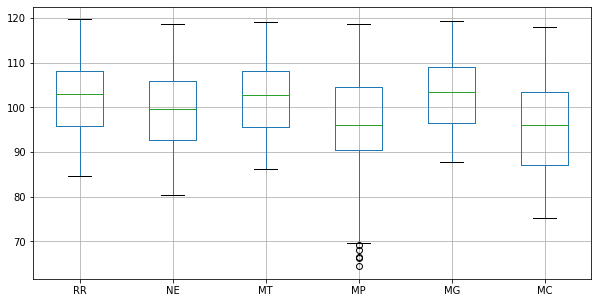

In [78]:
df_all.boxplot(figsize= (10, 5))

In [32]:
df_DcConsume = pd.DataFrame({'CR':df_CR['dcConsume'], 'OS':df_OS['dcConsume'], 'MB':df_MB['dcConsume'], 'SH':df_SH['dcConsume'], 'LA':df_LA['dcConsume']})

In [12]:
df_rr = df_DcConsume.mean(1)

In [16]:
df_ne = df_DcConsume.mean(1)

In [21]:
df_mt = df_DcConsume.mean(1)

In [25]:
df_mp = df_DcConsume.mean(1)

In [29]:
df_mg = df_DcConsume.mean(1)

In [33]:
df_mc = df_DcConsume.mean(1)

In [42]:
type(df_rr)

pandas.core.series.Series

In [43]:
df_rr = pd.DataFrame(df_rr)
df_rr = df_rr.rename(columns = {0:'RR'})

df_ne = pd.DataFrame(df_ne)
df_ne = df_ne.rename(columns = {0:'NE'})

df_mt = pd.DataFrame(df_mt)
df_mt = df_mt.rename(columns = {0:'MT'})

df_mp = pd.DataFrame(df_mp)
df_mp = df_mp.rename(columns = {0:'MP'})

df_mg = pd.DataFrame(df_mg)
df_mg = df_mg.rename(columns = {0:'MG'})

df_mc = pd.DataFrame(df_mc)
df_mc = df_mc.rename(columns = {0:'MC'})

In [44]:
df_all = pd.concat([df_rr, df_ne, df_mt, df_mp, df_mg, df_mc], axis=1)
df_all

,RR,NE,MT,MP,MG,MC
0,45985.5366,39717.8850,46076.7564,46013.4956,46034.3942,46000.9904
1,46388.5600,39674.3172,46256.8148,29991.0200,43765.4058,39628.1918
2,45873.4424,39590.6458,45952.3772,41556.0000,43974.9930,39535.4872
3,45465.3398,39641.3000,46158.5492,42189.2050,43556.1010,39727.1696
4,46029.9166,39600.7936,46007.6854,43065.2000,43582.4692,39843.3304
...,...,...,...,...,...,...
1004,49677.1580,43169.0194,49411.4754,44368.3500,47558.5076,43934.2280
1005,49567.1070,42831.5240,48815.6402,44629.8376,47575.7504,44027.8792
1006,49097.7100,42783.7812,49268.8034,47508.0000,47432.6678,43841.9002
1007,49510.3300,42713.7700,49374.5152,47508.0000,47605.5146,43523.0600


<AxesSubplot:>

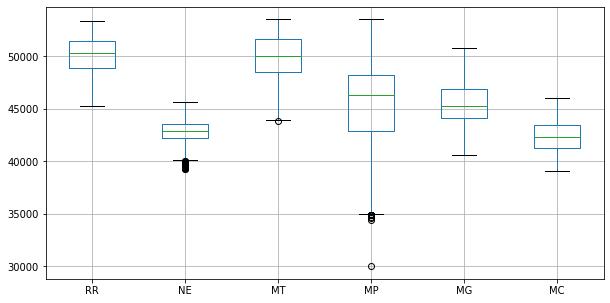

In [51]:
df_all.boxplot(figsize= (10, 5))